# 1.1: Introductie tot TensorFlow 2

Deze notebook is een introductie tot TensorFlow en hoe modellen opgebouwd kunnen worden, gebruik makend van tensoren als basiscomponent.
</br>Sommige cellen zijn reeds ingevuld; bij diegene waar __*TODO*__ staat moet je zelf nog iets aanvullen om de code werkende te krijgen.

## Installatie van TensorFlow

TensorFlow is een software framework voor machine learning taken. Wij zullen in het labo de Python-implementatie gebruiken.
</br>Alvorens we van start kunnen gaan, moeten we TensorFlow installeren. Wanneer TensorFlow reeds geïnstalleerd is, kan je nagaan wat de versie is (minimum versie 2.0.0 is vereist).

In [2]:
# Zet onderstaande regel uit commentaar om de laatste versie van TensorFlow te downloaden.
# !pip install tensorflow

import tensorflow as tf
print("TensorFlow version:",tf.__version__)

TensorFlow version: 2.7.0


## 1. Het gebruik van tensoren

De naam 'TensorFlow' staat voor de __flow (= wiskundige berekeningen)__ van __Tensoren__. 
</br>Tensoren zijn data structuren die je kan zien als __multi-dimensionale vectoren__, van bijvoorbeeld het type string of integer. Door gebruik van tensoren kan data voorgesteld worden in hogere dimensies.

Een <b>Tensor</b> heeft twee belangrijke eigenschappen:
- *shape*: geeft de dimensie weer.
- *rank*: geeft het aantal dimensies weer.

In onderstaande cellen wordt duidelijk hoe je zelf een tensor kan definiëren. 

### 0-dimensionale Tensors (bv. een getal)

Aan de hand van een 0-dim tensor kan je waarde zonder dimensies (zoals een getal of een string) toekennen aan een variable. In onderstaand voorbeeld worden 2 constante tensoren aangemaakt.

In [3]:
sport = tf.constant("F1", tf.string)
waarde = tf.constant(3.84, tf.float64)

Vervolgens kunnen we de rank (= aantal dimensies van deze tensoren afprinten):

In [4]:
print("'sport' is een {}-dim Tensor".format(tf.rank(sport))) 
print("'waarde' is een {}-dim Tensor".format(tf.rank(waarde)))

'sport' is een 0-dim Tensor
'waarde' is een 0-dim Tensor


### 1-dimensionale Tensors (vectoren en lists)

Dit type tensoren hebben 1 dimensie, en kennen we vooral als vectoren en lijsten. Net als de *rank* drukken we ditmaal ook de *shape* (=dimensie) af.

In [5]:
sporten = tf.constant(["F1", "voetbal"], tf.string)
waarden = tf.constant([398, 38.2, 3, 9], tf.float64)

print("`sporten` is een {}-d Tensor met als shape: {}".format(tf.rank(sporten), tf.shape(sporten)))
print("`waarden` is een {}-d Tensor met als shape: {}".format(tf.rank(waarden), tf.shape(waarden)))

`sporten` is een 1-d Tensor met als shape: [2]
`waarden` is een 1-d Tensor met als shape: [4]


### 2-dimensionale Tensors (matrices)

Een 2-dimensionale tensor is een matrix, waar je dus zowel een aantal rijen als kolommen hebt. 

In [8]:
''' TODO: maak een 2-dimensionale tensor van het type float64. '''
matrix = tf.constant([["wow", "geweldig"],["epico", "whauw"]], tf.string)

# Aan onderstaande code hoef je niets aan te wijzigen. Dit is code om te testen of jouw gedefinieerde tensor klopt.
assert isinstance(matrix, tf.Tensor), "matrix moet een tf Tensor object zijn"
assert tf.rank(matrix.numpy()) == 2, "rank moet gelijk zijn aan 2"

In [9]:
print("`matrix` is een {}-d Tensor met als shape: {}".format(tf.rank(matrix), tf.shape(matrix)))

`matrix` is een 2-d Tensor met als shape: [2 2]


### Tensors van hogere dimensies

Deze worden vooral gebruikt in toepassingen waar in __hogere dimensies__ gewerkt wordt. 
</br>Zo wordt in computer vision dikwijls met 4-dimensionale tensors gewerkt, waar afbeeldingen als input worden aangeleverd. Mogelijke dimensies in dit geval zijn: 
- het aantal afbeeldingen
- afbeeldingshoogte
- afbeeldingsbreedte
- aantal kleurkanalen (RGB heeft bijvoorbeeld 3 kleurkanalen)

In [12]:
''' 
TODO: maak een tensor om 50 RGB afbeeldingen op te slaan? Elke afbeelding heeft een grootte van 200 x 200. Je mag dit doen dmv de tf.zeros functie. 
Zie ook: https://www.tensorflow.org/api_docs/python/tf/zeros
'''
afbeeldingen = tf.zeros([50,200,200,3], tf.float64)

assert isinstance(afbeeldingen, tf.Tensor), "'afbeeldingen' moet een tf Tensor object zijn"
assert tf.rank(afbeeldingen).numpy() == 4, "rank moet gelijk zijn aan 4"
assert tf.shape(afbeeldingen).numpy().tolist() == [50, 200, 200, 3], "matrix heeft de verkeerde shape"

Subtensors va multi-dimensionale tensors kunnen opgevraagd worden door gebruik te maken van __slicing__.

We printen allereerst de volledige matrix:

In [15]:
print(matrix)

tf.Tensor(
[[b'wow' b'geweldig']
 [b'epico' b'whauw']], shape=(2, 2), dtype=string)


We extraheren de eerste rij, de eerste kolom, en een scalair uit de matrix:

In [17]:
rij_vector = matrix[1]
kolom_vector = matrix[:,1]
scalair = matrix[0,1]

In [18]:
print("'rij_vector': {}".format(rij_vector))
print("'kolom_vector': {}".format(kolom_vector))
print("'scalair': {}".format(scalair))

'rij_vector': [b'epico' b'whauw']
'kolom_vector': [b'geweldig' b'whauw']
'scalair': b'geweldig'


## 2. Berekeningen op Tensors

Berekeningen in TensorFlow kunnen uitgevoerd worden dmv *computation graphs*. Een node in zo een graph stelt een variable of een bewerking voor. Door deze te schakelen aan elkaar kunnen we het resultaat van één of meerdere nodes laten doorvloeien naar de volgende in de graph.
</br></br>We stellen een graph op door Tensoren te definiëren (die data bevatten) en de wiskundige operaties die er kunnen op uitgevoerd worden (zoals optellen, aftrekken, en vermenigvuldigen). 

__Voorbeeld 1:__

![computation graph](files/graph.png)

In [19]:
# Aanmaken van de tensoren + toekennen waarden
a = tf.constant(23)
b = tf.constant(61)

# Optellen van beiden (beide opties zijn mogelijk)
c1 = tf.add(a, b)
c2 = a + b

print(c1)
print(c2)

tf.Tensor(84, shape=(), dtype=int32)
tf.Tensor(84, shape=(), dtype=int32)


Het resultaat van deze berekening is een Tensor met waarde 84. Ga dit na door deze berekening zelf uit te voeren.

__Voorbeeld 2:__

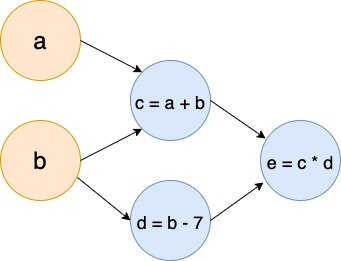

Vertrekkende van <code>a</code> en <code>b</code> wordt uiteindelijk output <code>e</code> berekend. Elke node in de graph voert een berekening uit, waarna het resultaat naar de volgende node wordt verstuurd.

We schrijven zelf een functie om deze berekening te definieren:

In [20]:
def func(a,b):
    ''' 
    TODO: definieer de operaties voor c, d, e (gebruik tf.add, tf.subtract, tf.multiply,..) 
    Bekijk zeker de TensorFlow API voor meer info hoe je deze operaties kan gebruiken: https://www.tensorflow.org/api_docs/python/tf/math/
    '''
    c = tf.add(a, b)
    d = tf.subtract(b, 7)
    e = tf.multiply(c, d)
    return e

Onze functie kunnen we nu oproepen om de computation graph op te lossen. Dit doen we door een waarde voor <code>a</code> en <code>b</code> door te geven.

In [21]:
# Voorbeeld: initialisatie van a = 3,2 en b = 2,7
a, b = 3.2, 2.7

# Oproepen van onze functie waarbij we a en b doorgeven
e = func(a,b)

# Het resultaat van de computation graph afdrukken
print(e)

tf.Tensor(-25.37, shape=(), dtype=float32)


Het resultaat is opnieuw een Tensor met waarde -25,37.

## 3. Een neuraal netwerk in TensorFlow

Tot nu toe hebben we tensoren gebruikt om een heel eenvoudig neuraal netwerkje op te bouwen. </br>

We kunnen een stap verder gaan en een volledig neuraal netwerk bouwen in TensorFlow. Keras wordt als high-level API binnen TensorFlow gebruikt en laat toe om op een intuitieve en laagdrempelige manier modellen te bouwen en te trainen. 

Let op: het opstellen van een model ≠ trainen van een model. Toch kunnen we reeds een voorspelling laten doen, die weliswaar volledig willekeurige resultaten teruggeeft aangezien de gewichten random zijn geïnitialiseerd.

__Voorbeeld:__
We starten met een eenvoudig netwerk met __1 neuron en 1 hidden laag__. 
</br> De functie om een voorspelling te maken in dit kleine netwerk is als volgt: 
</br></br>$out = \sigma(WX +b)$ 

- W = matrix van gewichten van ons netwerk
- X = input
- b = bias-term (zie ook de theorieles om het belang hiervan op te frissen)
- $\sigma$ = activatiefunctie (hier de sigmoid-functie)
- out = het resultaat van deze bewerking
</br>

*In de legende is in kleur aangegeven hoe je deze nodes kan definieren in Tensorflow.*

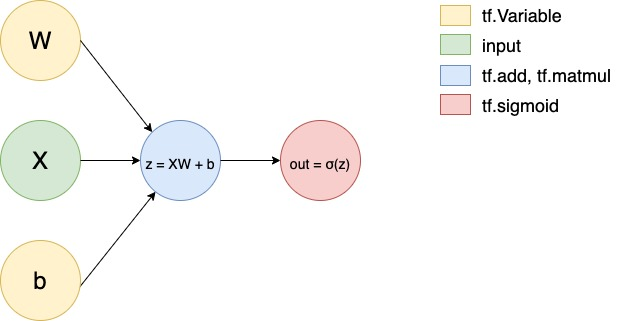

### Methode 1: door het manueel definieren van een Layer klasse

De bouwblokken van neurale netwerken in TensorFlow zijn <code>Layers</code>. 
</br>Er kunnen op deze componenten bewerkingen op uitgevoerd worden, zoals het updaten van gewichten en het berekenen van de loss.
</br>__Merk op: we stellen hier ons model op, maar dit is nog niet getraind. We kunnen het model wel voorspellingen laten doen, maar we zullen op dit moment nog willekeurige resultaten terugkrijgen.__ 

In [22]:
# x: input
# n_output_nodes: aantal output nodes (hier = 1)
# input_shape: shape van de input

class DenseLayer(tf.keras.layers.Layer):
    def __init__(self, n_output_nodes):
        super(DenseLayer, self).__init__()
        self.n_output_nodes = n_output_nodes
        
    # In de build functie zal je de dimensies van het netwerk initialiseren
    def build(self, input_shape):
        d = int(input_shape[-1]) # Door [-1] op te roepen kunnen we het laatste element uit onze input_shape tensor halen.

        # Definiëren en initialiseren van de weight paramters (W) en de bias (b).
        # Belangrijk: bij het initialiseren van de gewichten worden deze willekeurig geïnitialiseerd (volgens normaalverdeling)
        self.W = self.add_weight("weight", shape = [d, self.n_output_nodes])
        self.b = self.add_weight("bias", shape = [1, self.n_output_nodes])
        
        print(self.W)
    
    # De call functie zullen we gebruiken om onze voorspelling te doen (met andere woorden: een input geven aan ons model en de voorspelling terugkrijgen).
    def call(self, x):
        '''
        TODO: definieer de berekening voor z (zie de figuur). Tip: bekijk de operaties die je op om matrices kan doen in TensorFlow: https://www.tensorflow.org/api_docs/python/tf/linalg/
        '''
        z = tf.add(tf.multiply(x, self.W), self.b) 
        
        '''TODO: definieer de Sigmoid functie als activatiefunctie.'''
        out = tf.sigmoid(z)
        return out

In [23]:
# We kiezen voor een fixed seed zodat we de resultaten van dit model later kunnen reproduceren
tf.random.set_seed(1)

We maken vervolgens ons model uit bovenstaande figuur na. Zoals je ziet bestaat ons model uit __hidden 1 Dense laag__ en 1 output.

In [24]:
# Aanmaken van een layer met 1 output node (rode node op de figuur)
layer = DenseLayer(1)

# We maken ons netwerk aan als shape van de input (1,2) => de vector die X en W opslaat. 
layer.build((1,2))

# We definiëren de input die we aan ons netwerk gaan voeden. Merk opnieuw de shape op. 
# Je merkt ook dat we [[1,2.]] als constante definiëren. De '.' is hierbij belangrijk, want zo zal dit impliciet van het type float32 zijn. Dit is nodig bij matmul, waar beide operanden van hetzelfde datatype moeten zijn.
x = tf.constant([[1,2.]], shape=(1,2))

# Out = resultaat van de computation graph
out = layer.call(x)

<tf.Variable 'weight:0' shape=(2, 1) dtype=float32, numpy=
array([[-0.947153 ],
       [ 1.1355604]], dtype=float32)>


In [25]:
# Printen van de output
print(out.numpy())

[[0.28656188 0.13478532]
 [0.76324844 0.9093837 ]]


We kunnen vervolgens de gewichten afdrukken. Belangrijk: bij het initialiseren van de gewichten werden deze willekeurig geïnitialiseerd (volgens normaalverdeling).

In [26]:
print(layer.weights)

[<tf.Variable 'weight:0' shape=(2, 1) dtype=float32, numpy=
array([[-0.947153 ],
       [ 1.1355604]], dtype=float32)>, <tf.Variable 'bias:0' shape=(1, 1) dtype=float32, numpy=array([[0.03501177]], dtype=float32)>]


### Methode 2: Een model opbouwen via de Sequential klasse

Naast het zelf definieren van een <code>Layer</code> zoals we hiervoor hebben gedaan, heeft TensorFlow enkele veelgebruikte <code>Layers</code> voorgedefinieerd, waaronder de <code>Dense</code> laag. </br>Door gebruik te maken van het <code>Sequential</code> model kunnen heel eenvoudig verschillende lagen op elkaar gestapeld worden. 
</br>Daarnaast zal het ons ook toelaten om slechts met enkele codelijnen een volledig model op te stellen.

We stellen ons zelfde model op, ditmaal gebruik makend van het <code>Sequential</code> model.

__Merk op: we stellen hier ons model op, maar dit is nog niet getraind. We kunnen het model wel voorspellingen laten doen, maar we zullen op dit moment nog willekeurige resultaten terugkrijgen.__ 

In [34]:
tf.random.set_seed(1)

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Aantal output nodes
n_output_nodes = 1

# Definieren van het model
model = Sequential()

'''TODO: 
Definieer een Dense laag (=fully-connected) om z te berekenen.
Tip: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense
'''
dense_layer = tf.keras.layers.Dense(n_output_nodes)

# Voeg de Dense laag toe aan het model
model.add(dense_layer)

In [37]:
# Testen van het model
x = tf.constant([[1,2.]], shape = (1,2))

'''TODO: doe een voorspelling met de input.'''
out = model.call(x)
print(out)

tf.Tensor([[1.3239678]], shape=(1, 1), dtype=float32)


We kunnen vervolgens de gewichten afdrukken. Belangrijk: bij het initialiseren van de gewichten werden deze willekeurig geïnitialiseerd (volgens normaalverdeling).

In [38]:
print(model.weights)

[<tf.Variable 'dense_2/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[-0.947153 ],
       [ 1.1355604]], dtype=float32)>, <tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


### Methode 3: Model Subklasse (optioneel - voor de liefhebbers)

Een alternatieve manier om een model op te stellen is door een <code>subklasse</code> te maken van <code>Model</code>. </br>De <code>Model</code> klasse laat toe om op een flexibele manier __eigen lagen, activatiefuncties en modellen te definieren__, waarna voorspellingen gemaakt kunnen worden (forward propagation) door de <code>call</code> functie op te roepen.

We stellen ditmaal ons model op door gebruik te maken van de <code>Model</code> subklasse:

In [ ]:
tf.random.set_seed(1)

from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

class SubclassModel(tf.keras.Model):
    def __init__(self, n_output_nodes):
        super(SubclassModel, self).__init__()
        '''
        Definieer de Dense laag. Vergeet de activatiefunctie ook niet te definiëren.
        '''
        self.dense_layer = 
        
    def call(self, inputs):
        return self.dense_layer(inputs)

In [ ]:
# Testen van het model
n_output_nodes = 1
model = SubclassModel(n_output_nodes)

x = tf.constant([[1,2.]], shape = (1,2))

print(model.call(x))

De Model subklasse geeft ons veel flexibiliteit zodat het model zich anders kan gedragen bij training en inferencing. Door bijvoorbeeld een boolean <code>geefInputEnShape</code> te voorzien in de <code>Call</code> functie, kunnen we de input van het model teruggeven in plaats van forward propagation te laten uitvoeren.

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

class SubclassModel(tf.keras.Model):
    # In __init__ definieren we de lagen
    def __init__(self, n_output_nodes):
        super(SubclassModel, self).__init__()
        self.dense_layer = tf.keras.layers.Dense(n_output_nodes, activation = "sigmoid")
    
    '''Todo: voorzie mogelijkheid dat ofwel de voorspelling, ofwel de input wordt weergegeven (boolean geefTerug) '''
    def call(self, inputs, geefInputEnShape=False):
        x = self.dense_layer(inputs)
        
        if geefInputEnShape:
            
        return x

In [ ]:
# Testen van het model

n_output_nodes = 1
model = SubclassModel(n_output_nodes)

x = tf.constant([[1,2.]], shape = (1,2))
out_forward_propagation = model.call(x)
print("Forward propagation output: {}".format(out_forward_propagation))

In [ ]:
'''TODO: roep nu de call methode op waarbij de input en shape teruggegeven worden'''

out_input_and_shape = 
print("Output input en shape: {}".format(out_input_and_shape))

## 4. Optimaliseren van een loss functie (later kunnen we deze functionaliteit gebruiken om een neuraal netwerk te trainen)

### Gradient Tape

*Automatic differentiation* (gebruik maken van de kettingregel om op een efficiente manier de gradients te berekenen) ligt aan de basis van de trainingsfase (zie theorie). 
</br>TensorFlow maakt gebruik van GradientTape <code>tf.GradientTape</code> om bewerkingen bij te houden zodat deze later gebruikt kunnen worden om de gradients te berekenen. 

Bij Forward Propagation worden alle bewerkingen dan bijgehouden op een soort "tape" die als het ware "omgekeerd afgespeeld" wordt om de gradients te berekenen. 

</br>__Voorbeeld:__

Met een eenvoudig voorbeeld gaan we de werking van de <code>GradientTape</code> na. 

Gegeven is de functie $y = 3x^2$:

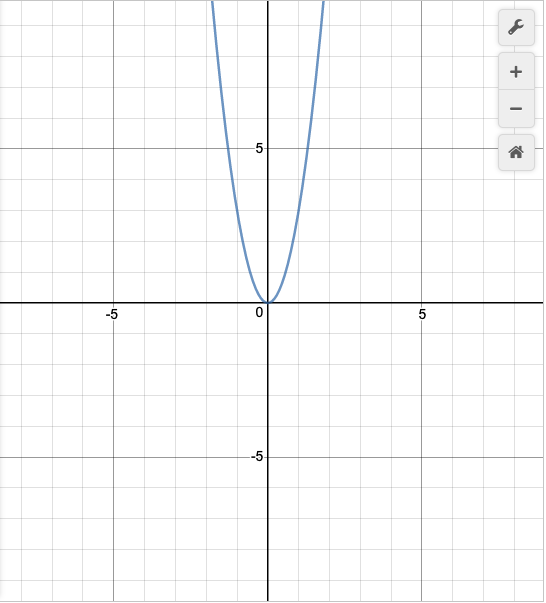

Van deze functie willen we de __gradient__ (= de partiële afgeleide) berekenen. We geven je nu al de oplossing ($y' = 6x$), maar we gaan hetzelfde resultaat ook via <code>GradientTape</code> proberen bekomen. 
</br>In het voorbeeld gebruiken we $x = 3$ als variabele om de correctheid te testen. Ingevuld zou dit dus $y' = 18$ moeten geven.

In [39]:
# y = 3x^2
# Voorbeeld met x = 3.0

x = tf.Variable(3.0) 

# Initialisatie van de Gradient Tape
with tf.GradientTape() as tape:
    # Definitie van de loss functie (hier dus de functie uit ons voorbeeld)
    y = 3 * x ** 2
    
## Berekenen van de gradient = partiël afgeleide van y tot x
dy_dx = tape.gradient(y, x) # dy_dx = 6x

We kunnen vervolgens de gradient tape (of dus de partieel afgeleide van deze functie) berekenen, waarbij x = 3.

In [40]:
print(dy_dx)

tf.Tensor(18.0, shape=(), dtype=float32)


Het resultaat is hier dus 18. Merk op dat dit overeenkomt met onze eerdere, analytisch berekening.

### Minimaliseren van de loss functie

Wanneer we een netwerk trainen, wordt __Gradient Descent__ gebruikt om de loss functie te minimaliseren. </br>We berekenen de gradient van de functie $y$, die aangeeft aan in welke richting deze functie het sterkst varieert. Hierdoor weten we dus ook in welke richting we moeten stappen in het landschap om het minimum van deze functie te bekomen.

__Voorbeeld:__
</br>In dit voorbeeld gaan we de loss proberen minimaliseren. We hebben een target variable $x_t$, die we een initiële, zelf gekozen waarde hebben toegekend (hier bv. is $x_t$ = 3).
</br>Vervolgens willen we deze waarde proberen voorspellen met de variabele $x$. Je kan dit interpreteren als onze *gok-variabele*.

Analytisch kunnen we dit eenvoudig oplossen ($x = x_t$), maar in dit voorbeeld doen we dit door de loss functie $L = (x - x_t)^2$ te minimaliseren door gebruik te maken van <code>GradientTape</code>. </br>Wanneer bijvoorbeeld $x$ = 1, dan is onze loss = 4 want $(x - x_t)^2$ = $(1 - 3)^2$ = 4.

Wanneer we volledige neurale netwerken gaan trainen komt deze techniek goed van pas. 

In [42]:
import matplotlib.pyplot as plt

x=[[0.40308788]]


Text(0, 0.5, 'x')

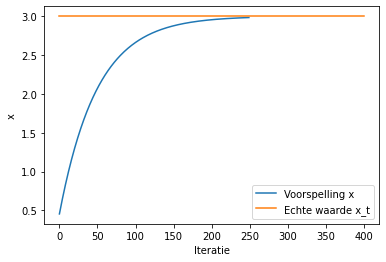

In [43]:
# Toekennen van een willekeurige waarde aan x

x = tf.Variable([tf.random.normal([1])])
print("x={}".format(x.numpy()))

learning_rate = 1e-2 # ingestelde learning rate
history = []

x_t = 3 # target label dat we willen voorspellen

# Stochastic Gradient descent wordt een aantal iteraties uitgevoerd, waar per iteratie de loss wordt berekend, de gradient, en de gradients worden geüpdatet.
for i in range(250):
    with tf.GradientTape() as tape:
        '''TODO: definieer de loss functie, zoals hierboven gedefinieerd'''
        loss = (x - x_t)**2
    
    # Minimaliseren van de loss mbv Gradient Tape
    grad = tape.gradient(loss, x)
    x_new = x - learning_rate * grad 
    x.assign(x_new) # updaten van x
    history.append(x.numpy()[0]) # bijhouden van x zodat we kunnen plotten
    
# Plotten van de waarde x terwijl we de loss minimaliseren
plt.plot(history)
plt.plot([0,400],[x_t,x_t])
plt.legend(("Voorspelling x", "Echte waarde x_t"))
plt.xlabel('Iteratie')
plt.ylabel('x')

In bovenstaande grafiek kan je het verloop van zien van onze voorspelling $x$ (blauw) en onze initieel gekozen target waarde $x_t$ (oranje). Naarmate we meer iteraties uitvoeren, wordt de loss van onze functie kleiner, en dus benadert $x$ steeds beter $x_t$. Achter de schermen berekenen we de gradient (en de daaruit volgende loss) en passen we onze parameter $x$ aan.

In dit voorbeeld gebruiken we <code>GradientTape</code> om onze loss te minimaliseren. Uiteraard wisten we als van op voorhand dat $x$ gelijk moest zijn aan $x_t$ om aan een loss van 0 te komen, maar door dit eenvoudig voorbeeld zie je hoe je dit kan inzetten om een loss functie te minimaliseren. 

De implementatie van een <code>GradientTape</code> komt natuurlijk volledig tot zijn recht wanneer we een volwaardig neuraal netwerk gaan trainen. Wanneer je een model opstelt dat niet erg geavanceerd is, kan je in plaats van een <code>GradientTape</code> altijd de <code>Sequential</code> klasse gebruiken, wat een iets laagdrempelige manier van werken is.